# Importing Dataset from kaggel

Dataset Link : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
!pip install kaggle -q

Download Your Kaggle API Key:

Go to your Kaggle account settings (https://www.kaggle.com/account).
Scroll down to the "API" section.
Click on "Create New API Token." This will download a JSON file named kaggle.json to your computer.

In [ ]:
from google.colab import files
# upload your json file here
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahul713","key":"ee3ba3d72e0aaca9b6393d3a6b2a2c5c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 2.02MB/s]


In [ ]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = 'svg'

In [ ]:
df = pd.read_csv('./data.csv' , index_col='id')

# Data Preprocessing

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Dealing with Missing value

In [ ]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [ ]:
df.drop(columns='Unnamed: 32' , inplace = True)

In [ ]:
df.shape

(569, 31)

## Dealing with Categorical data

**One Hot Encoding** :  One-hot encoding is a method to convert categorical data into a binary matrix, where each category becomes a separate binary column, and each row represents an observation with 1s and 0s indicating the presence or absence of a particular category.




 * It preserves category information and ensures compatibility with such algorithms.
 * However, it increases dimensionality, potentially leading to computational challenges, and can introduce collinearity among binary columns.
 * Sparse data can also be an issue with many unique categories.






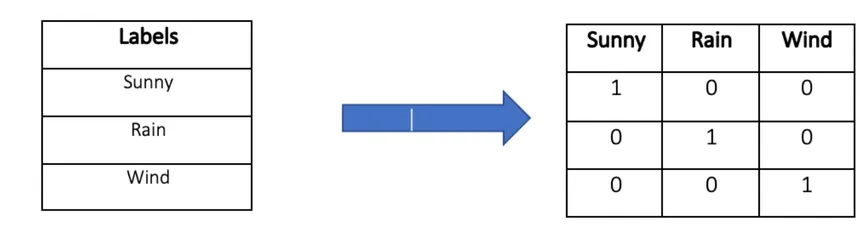

In [ ]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
df = pd.get_dummies(df , drop_first= True)

In [ ]:
df.rename(columns={'diagnosis_M' : 'Target'} , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se      

## Plotting graph


**Correlation**
* Correlation is a statistical measure that quantifies the degree of association or relationship between two or more variables in a dataset. It helps us understand how changes in one variable are related to changes in another.

* Correlation values typically range from -1 to 1. A positive correlation (closer to 1) indicates that as one variable increases, the other tends to increase as well. Conversely, a negative correlation (closer to -1) suggests that as one variable increases, the other tends to decrease. A correlation near 0 implies a weak or no linear relationship between the variables.

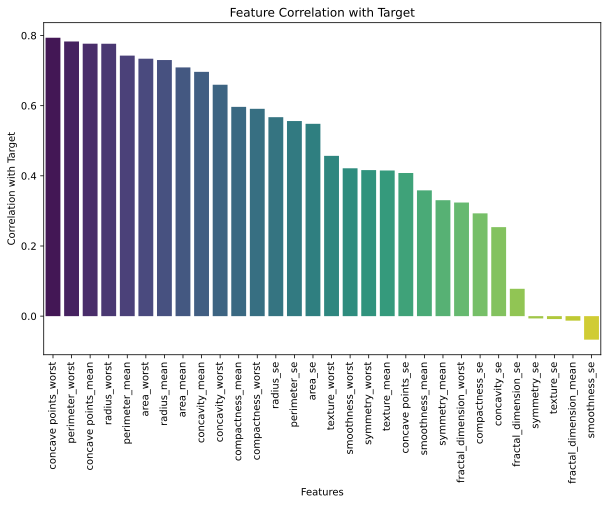

In [ ]:
features = df.drop(columns='Target')
correlation = features.corrwith(df['Target']).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Feature Correlation with Target')
plt.xticks(rotation=90)
plt.show()

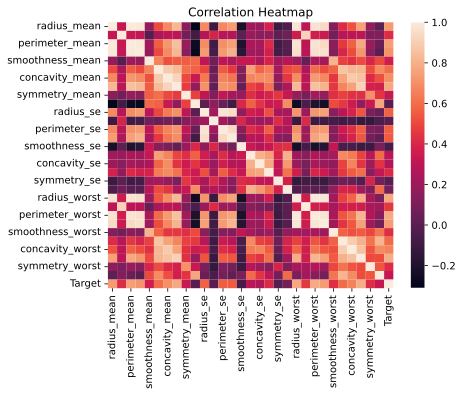

In [ ]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

## Spliting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = features
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

**Q : can we do feature scaling before splitting tha data and why ?**
****
A : Yes, you can and often should perform feature scaling before splitting your data when preparing it for machine learning.

It's generally a good practice to perform feature scaling before splitting the data . because of

* Preventing Data Leakage
* Consistency
* Realistic Evaluation

## Feature Scaling

Feature scaling is a data preprocessing technique that aims to standardize or normalize the range of independent variables or features in your dataset. Common methods for feature scaling include Min-Max scaling and Standardization (Z-score scaling).

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



```
Ques :
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
how does it prevent overfitting ?
```
****
Ans : while feature scaling itself does not directly prevent overfitting, it plays a crucial role in maintaining consistency between the training and testing datasets, improving model stability, and influencing the regularization process. These factors collectively contribute to creating models that are less prone to overfitting, leading to better generalization to unseen data.


# Model

* **Accuracy** : Accuracy is like a report card grade for your model. It tells you the percentage of correctly predicted cases out of all the cases. If your model has an accuracy of 90%, it means it got 90 out of 100 predictions correct.

* **Precision**: Precision is about being careful and not making too many mistakes. It tells you the percentage of correctly predicted positive cases out of all the cases your model predicted as positive. High precision means your model is good at not labeling things as positive when they're not.

* **Recall**: Recall is like making sure you don't miss important things. It tells you the percentage of correctly predicted positive cases out of all the actual positive cases. High recall means your model is good at finding all the positive cases.

* **F1 Score**: The F1 score is like a balance between precision and recall. It combines both to give you a single number that represents how well your model is doing. It's helpful when you want to consider both avoiding mistakes (precision) and not missing important things (recall).

* **ROC Score**: The ROC score is like a test for your model's ability to distinguish between two things. It measures how well your model can tell the difference between positive and negative cases. A higher ROC score means your model is better at this task.

* **Confusion Matrix**: A confusion matrix is like a table that shows you how your model's predictions match up with the actual outcomes. It breaks down your predictions into true positives, true negatives, false positives, and false negatives. It's a useful tool to understand where your model is making mistakes.

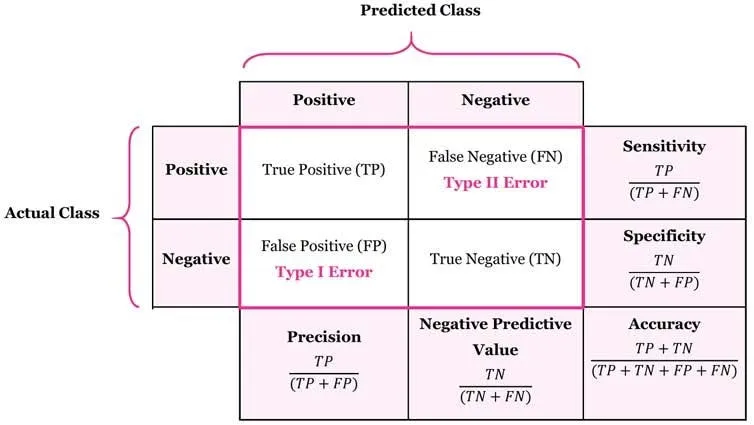

In [ ]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix , roc_curve , roc_auc_score

In [ ]:

def get_result(y_test , y_pred , model_name):
  accuracy = accuracy_score(y_test , y_pred)
  precision = precision_score(y_test , y_pred)
  recall = recall_score(y_test , y_pred)
  f1 = f1_score(y_test , y_pred)
  roc = roc_auc_score(y_test , y_pred)

  result = pd.DataFrame([[model_name , accuracy , precision , recall , f1 , roc]],
                        columns=['Model','accuracy' , 'precision' , 'recall' , 'f1' , 'roc'])
  return result

## Logistic Regression

let's explain logistic regression in layman's terms:

Imagine you want to predict whether someone will pass or fail an exam based on how many hours they've studied. Logistic regression is like a magic formula that helps you do that.

Here's how it works:

* Line of Best Fit: First, you draw a line on a graph that tries to fit the data points. The x-axis represents the hours studied, and the y-axis represents the probability of passing the exam.

* S-Shaped Curve: This line isn't a straight line; it's shaped like an "S." It starts low on the left (low probability of passing with few hours studied) and goes up high on the right (high probability of passing with more hours studied).

* Prediction: Now, when you want to predict if someone will pass, you find out how many hours they've studied, go to the line, and see where it falls on the "S" curve. If it's closer to the top, they are likely to pass; if it's closer to the bottom, they may fail.

* Threshold: You can set a threshold on the "S" curve. For example, if the line is above a certain point on the curve, you say the person will pass; otherwise, you say they will fail. The threshold is like a pass/fail mark.

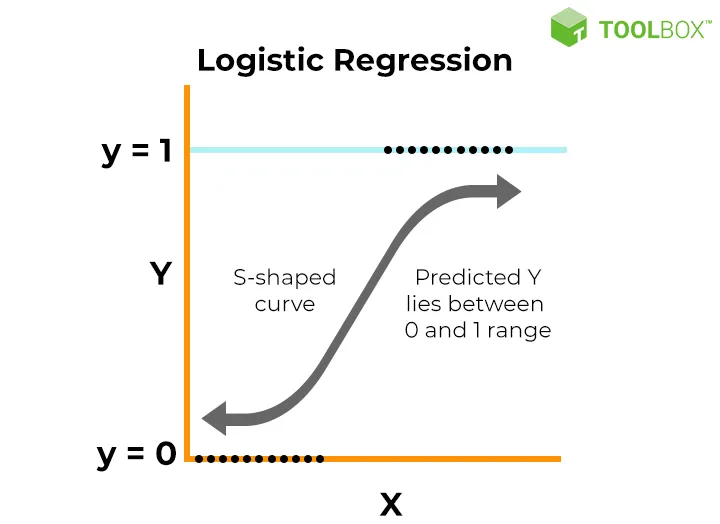

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train , y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(X_test)

### Evaluation matrics

In [ ]:
result = get_result(y_test , y_pred , 'Logistic regression')
result

,Model,accuracy,precision,recall,f1,roc
0,Logistic regression,0.964912,0.957447,0.957447,0.957447,0.963798


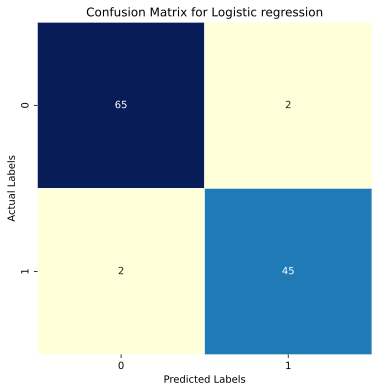

In [ ]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm , annot = True , cmap = 'YlGnBu' , fmt = 'd' , linewidths=.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic regression')

plt.show()

### Cross validation

Cross-validation is like a smart way to test how well your prediction model (like the one we used for predicting exam results) actually works. Instead of just using one set of data to train and test, cross-validation divides your data into multiple parts and tests your model multiple times.


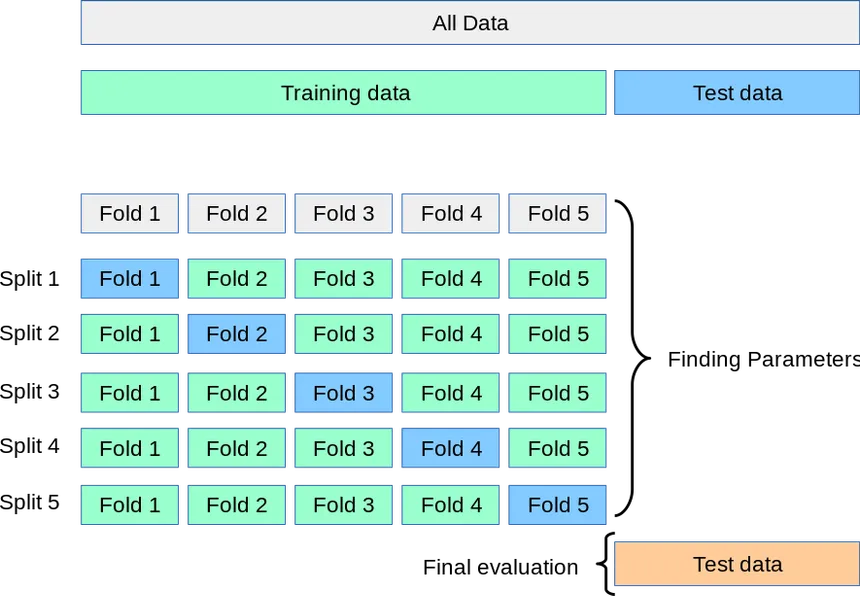

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr , X_train , y_train , cv=5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result = pd.DataFrame([['Logistic regression' , round(accuracies.mean()*100 , 2) , round(accuracies.std()*100 , 2)]] ,
                            columns=['Model' , 'Accuracy (mean)' , 'Standard Deviation'])

Accuracy is 98.02 %
Standard Deviation is 1.89 %


In [ ]:
cross_result

,Model,Accuracy (mean),Standard Deviation
0,Logistic regression,98.02,1.89


## Random Forest

* Imagine you have a big decision to make, like whether to go on a picnic or not, and you want to make the best choice. Instead of asking just one friend for advice, you decide to ask a whole bunch of friends.

* Each friend is like a small decision-maker. They look at the weather, check if you have the picnic supplies, and think about your preferences. Then, they vote on whether you should go on the picnic or not.

* Now, you might have some friends who are really good at predicting the weather, while others are great at knowing if you have the right supplies. By asking all of them and counting their votes, you get a well-rounded answer.

* A random forest in the world of computers is similar. It's a group of decision-makers (like your friends) called "trees." Each tree looks at some part of your data and makes a prediction. Then, all the trees vote on the final decision.

* Just like with your friends, some trees might be good at one thing, like recognizing patterns in data, while others are good at something else. By combining their opinions, the random forest often makes better predictions than just one decision-maker alone.

* So, think of a random forest as a group of decision-making "trees" coming together to help you make better choices in a more accurate and reliable way.

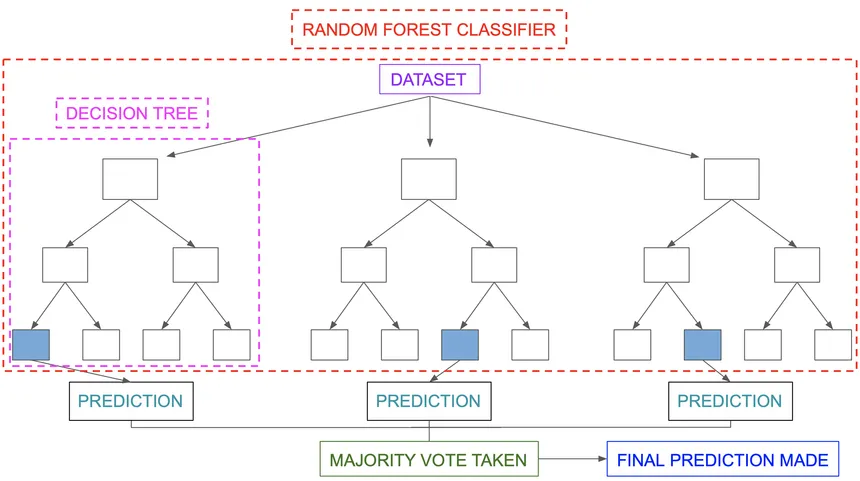

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(random_state = 0)
rm.fit(X_train , y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rm.predict(X_test)

### Evaluation matrics

In [ ]:
result_rm = get_result(y_test , y_pred , 'Random Forest')
result = pd.concat([result, result_rm], ignore_index=True)
result

,Model,accuracy,precision,recall,f1,roc
0,Logistic regression,0.964912,0.957447,0.957447,0.957447,0.963798
1,Random Forest,0.964912,0.938776,0.978723,0.958333,0.966974


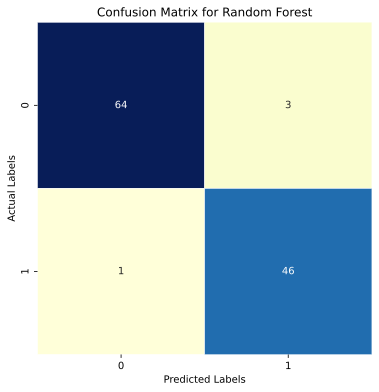

In [ ]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm , annot = True , cmap = 'YlGnBu' , fmt = 'd' , linewidths=.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest')

plt.show()

### Cross Validation

In [ ]:
accuracies = cross_val_score(rm , X_train , y_train , cv=5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result_rm = pd.DataFrame([['Random Forest' , round(accuracies.mean()*100 , 2) , round(accuracies.std()*100 , 2)]] ,
                            columns=['Model' , 'Accuracy (mean)' , 'Standard Deviation'])

cross_result = pd.concat([cross_result , cross_result_rm] , ignore_index=True)

Accuracy is 95.60 %
Standard Deviation is 1.97 %


In [ ]:
cross_result

,Model,Accuracy (mean),Standard Deviation
0,Logistic regression,98.02,1.89
1,Random Forest,95.60,1.97


## SVM Classifier
Think of SVM as a smart way to draw a line (or boundary) between two different groups of things. Imagine you have two types of fruit: apples and oranges. You want to separate them using a line.

SVM does this in a clever way:

* Find the Best Line: SVM looks for the best line that creates the biggest gap (like a buffer zone) between apples and oranges. This line is called the "hyperplane."

* Margin of Safety: The gap around the hyperplane is like a safety margin. It ensures that even if you get a fruit that's a bit tricky and falls near the line, you can still confidently say if it's an apple or an orange.

* Support Vectors: SVM also finds a few fruits that are closest to the line but still safely on their side. These fruits are like "support vectors." They help determine where the line should be.

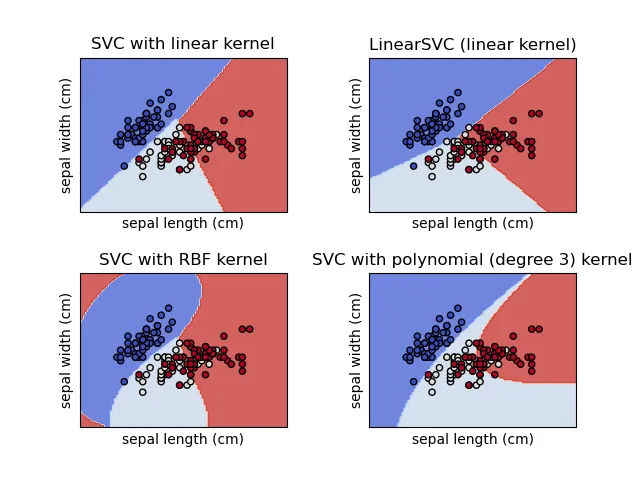

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(X_train , y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)

### Evaluation matrics

In [ ]:
result_svm = get_result(y_test=y_test ,y_pred=y_pred ,model_name='SVM')
result = pd.concat([result , result_svm] , ignore_index=True)
result

,Model,accuracy,precision,recall,f1,roc
0,Logistic regression,0.964912,0.957447,0.957447,0.957447,0.963798
1,Random Forest,0.964912,0.938776,0.978723,0.958333,0.966974
2,SVM,0.982456,1.000000,0.957447,0.978261,0.978723


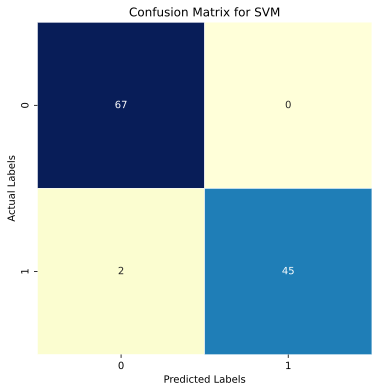

In [ ]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm , annot = True , cmap = 'YlGnBu' , fmt = 'd' , linewidths=.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for SVM')

plt.show()

### Cross validation

In [ ]:
accuracies = cross_val_score(svm , X_train , y_train , cv=5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result_svm = pd.DataFrame([['SVM' , round(accuracies.mean()*100 , 2) , round(accuracies.std()*100 , 2)]] ,
                            columns=['Model' , 'Accuracy (mean)' , 'Standard Deviation'])

cross_result = pd.concat([cross_result , cross_result_svm] , ignore_index=True)

Accuracy is 97.58 %
Standard Deviation is 1.89 %


In [ ]:
cross_result

,Model,Accuracy (mean),Standard Deviation
0,Logistic regression,98.02,1.89
1,Random Forest,95.60,1.97
2,SVM,97.58,1.89


## XGBoost

XGBoost, short for "Extreme Gradient Boosting," is like having a team of smart, decision-making friends who help you make the best choices.

Here's how it works:

* Learning from Mistakes: Imagine you're playing a game, and you keep making mistakes. XGBoost is like a friend who watches you play and notices where you go wrong.

* Boosting Confidence: Instead of just telling you what you did wrong, XGBoost helps you understand your mistakes better. It's like your friend saying, "You tend to make this kind of mistake more often."

* Getting Better: With this feedback, you start to play the game again, but now you're more careful about the mistakes you made before. XGBoost is like your friend guiding you, saying, "Remember to avoid this mistake, and you'll do better."

* Repeat and Improve: You keep playing and learning from your friend's advice. Each time you make a mistake, XGBoost helps you focus on the most important ones until you become really good at the game.



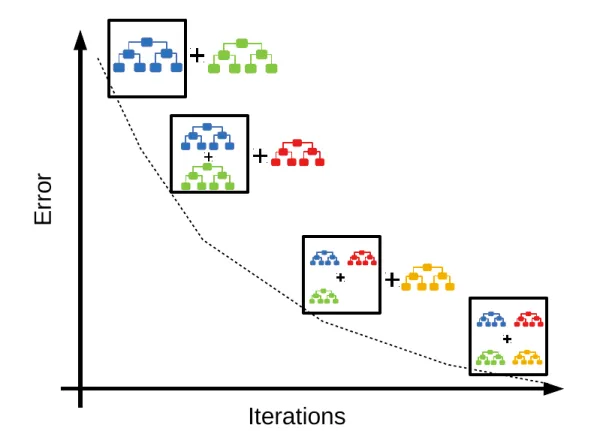

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
y_pred = xgb.predict(X_test)

### Evaluation matrics

In [ ]:
result_xgb =get_result(y_test=y_test ,y_pred=y_pred ,model_name='XGBoost')
result = pd.concat([result , result_xgb] , ignore_index=True)
result

,Model,accuracy,precision,recall,f1,roc
0,Logistic regression,0.964912,0.957447,0.957447,0.957447,0.963798
1,Random Forest,0.964912,0.938776,0.978723,0.958333,0.966974
2,SVM,0.982456,1.000000,0.957447,0.978261,0.978723
3,XGBoost,0.982456,1.000000,0.957447,0.978261,0.978723


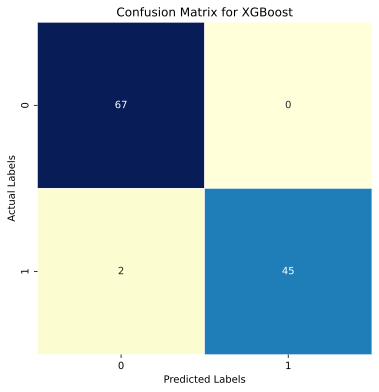

In [ ]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm , annot = True , cmap = 'YlGnBu' , fmt = 'd' , linewidths=.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for XGBoost')

plt.show()

### Cross validation

In [ ]:
accuracies = cross_val_score(xgb , X_train , y_train , cv=5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result_svm = pd.DataFrame([['XGBoost' , round(accuracies.mean()*100 , 2) , round(accuracies.std()*100 , 2)]] ,
                            columns=['Model' , 'Accuracy (mean)' , 'Standard Deviation'])

cross_result = pd.concat([cross_result , cross_result_svm] , ignore_index=True)

Accuracy is 96.92 %
Standard Deviation is 2.13 %


In [ ]:
cross_result

,Model,Accuracy (mean),Standard Deviation
0,Logistic regression,98.02,1.89
1,Random Forest,95.60,1.97
2,SVM,97.58,1.89
3,XGBoost,96.92,2.13


****
**Q : Difference between Random Forest and XGBoost**
****
Random Forest and XGBoost are both popular ensemble learning methods used in machine learning, but they have some key differences. Here's a simplified comparison:

1. Algorithm Type:

* Random Forest: It's an ensemble of decision trees, where each tree votes on the final prediction.
* XGBoost: It's also an ensemble of decision trees, but it uses a different boosting technique to build these trees sequentially, focusing on correcting errors made by the previous ones.

2. Handling Errors:

* Random Forest: Each tree in the forest is built independently, and they vote to make a final decision. Errors made by some trees may not be corrected by others.
* XGBoost: Trees are built sequentially, and each new tree focuses on the mistakes made by the previous ones. It tries to correct errors, making it often more accurate than a single tree or a Random Forest.

3. Performance:

* Random Forest: Generally works well "out of the box" and is less prone to overfitting. It's a robust and versatile choice.
* XGBoost: Tends to provide higher predictive accuracy but may require more tuning and parameter optimization. It's powerful but can be more sensitive to overfitting if not carefully configured.

4. Speed:

* Random Forest: Faster to train because trees are built independently and can be parallelized.
* XGBoost: Slower to train because of its sequential nature, but it's often faster at making predictions due to its optimization.

5. Interpretability:

* Random Forest: Easier to interpret because you can see the importance of each feature in the ensemble.
* XGBoost: Less straightforward to interpret due to its complex boosting process.



# Hyperparameter Tuning using RandomizedSearchCV on Logistic regression model



Random Search and Grid Search are two common techniques for hyperparameter tuning in machine learning, but they work differently. Let's compare them in simple terms:

* Random Search:

  * Random Search is like throwing darts randomly at a target. Each dart represents a combination of hyperparameters.
  * It doesn't try every possible combination but selects hyperparameters randomly from predefined ranges.
  * Pros: It's faster than Grid Search because it doesn't explore all combinations. It can find good hyperparameters more quickly.
  * Cons: It might miss the best hyperparameters because it's random.
* Grid Search:

  * Grid Search is like a meticulous search through a grid, trying every possible combination of hyperparameters systematically.
  * It explores all combinations within predefined ranges for each hyperparameter.
  * Pros: It's thorough and guarantees finding the best combination if it exists within the defined grid.
  * Cons: It can be slow and computationally expensive when there are many hyperparameters or wide search ranges.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = [
              {'penalty':['l1', 'l2', 'elasticnet', 'none'],
               'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               }
              ]

In [ ]:
randomized_search = RandomizedSearchCV(estimator = lr, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5 , verbose=3)

In [ ]:
randomized_search.fit(X_train , y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only '

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_iter=5,
                   n_jobs=-1,
                   param_distributions=[{'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                               1.75, 2],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   scoring='roc_auc', verbose=3)

In [ ]:
randomized_search.best_estimator_

LogisticRegression(C=0.75, random_state=0, solver='newton-cg')

In [ ]:
randomized_search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.75}

In [ ]:
randomized_search.best_score_

0.9954022988505746

# Final Model

In [ ]:
model = LogisticRegression(solver='lbfgs' , penalty='l2' , C=1.25  , random_state=0)

In [ ]:
model.fit(X_train , y_train)

LogisticRegression(C=1.25, random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
result_final =get_result(y_test=y_test ,y_pred=y_pred ,model_name='Final')
result = pd.concat([result , result_final] , ignore_index=True)

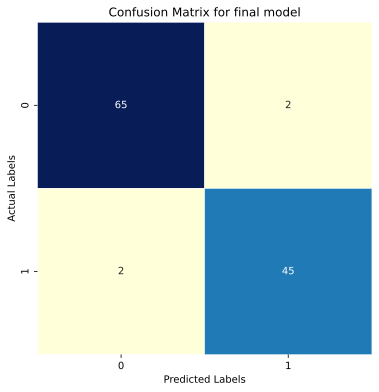

In [ ]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm , annot = True , cmap = 'YlGnBu' , fmt = 'd' , linewidths=.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for final model')

plt.show()

In [ ]:
accuracies = cross_val_score(model , X_train , y_train , cv=5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result_final = pd.DataFrame([['Final' , round(accuracies.mean()*100 , 2) , round(accuracies.std()*100 , 2)]] ,
                            columns=['Model' , 'Accuracy (mean)' , 'Standard Deviation'])

cross_result = pd.concat([cross_result , cross_result_final] , ignore_index=True)

Accuracy is 97.58 %
Standard Deviation is 1.62 %


In [ ]:
cross_result

,Model,Accuracy (mean),Standard Deviation
0,Logistic regression,98.02,1.89
1,Random Forest,95.60,1.97
2,SVM,97.58,1.89
3,XGBoost,96.92,2.13
4,Final,97.58,1.62


In [ ]:
result

,Model,accuracy,precision,recall,f1,roc
0,Logistic regression,0.964912,0.957447,0.957447,0.957447,0.963798
1,Random Forest,0.964912,0.938776,0.978723,0.958333,0.966974
2,SVM,0.982456,1.000000,0.957447,0.978261,0.978723
3,XGBoost,0.982456,1.000000,0.957447,0.978261,0.978723
4,Final,0.964912,0.957447,0.957447,0.957447,0.963798
